<a href="https://colab.research.google.com/github/JacekPardyak/vps/blob/master/VPS_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install pySpark and start Spark session

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('vps').getOrCreate()

Get the data and load to Spark

In [ ]:
!wget --continue https://raw.githubusercontent.com/JacekPardyak/vps/master/data/vps_churn_data_py.json -O /tmp/vps_churn_data_py.json
!wget --continue https://raw.githubusercontent.com/JacekPardyak/vps/master/data/vps_test_data_py.json -O /tmp/vps_test_data_py.json
df = spark.read.json('/tmp/vps_churn_data_py.json')
pr = spark.read.json('/tmp/vps_test_data_py.json')

--2021-09-07 13:24:52--  https://raw.githubusercontent.com/JacekPardyak/vps/master/data/vps_churn_data_py.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2021-09-07 13:24:52--  https://raw.githubusercontent.com/JacekPardyak/vps/master/data/vps_test_data_py.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



Check the basic statistics with **Spark**

In [ ]:
df.printSchema()

root
 |-- cpu_load_max_gradient: double (nullable = true)
 |-- cpu_load_mean_m_3: double (nullable = true)
 |-- cpu_load_monthly_mean_delta: double (nullable = true)
 |-- disk_octets_read_max_gradient: double (nullable = true)
 |-- disk_octets_read_mean_m_3: double (nullable = true)
 |-- disk_octets_read_monthly_mean_delta: double (nullable = true)
 |-- disk_octets_write_max_gradient: double (nullable = true)
 |-- disk_octets_write_mean_m_3: double (nullable = true)
 |-- disk_octets_write_monthly_mean_delta: double (nullable = true)
 |-- disk_ops_read_max_gradient: double (nullable = true)
 |-- disk_ops_read_mean_m_3: double (nullable = true)
 |-- disk_ops_read_monthly_mean_delta: double (nullable = true)
 |-- disk_ops_write_max_gradient: double (nullable = true)
 |-- disk_ops_write_mean_m_3: double (nullable = true)
 |-- disk_ops_write_monthly_mean_delta: double (nullable = true)
 |-- id: long (nullable = true)
 |-- is_churn: long (nullable = true)
 |-- network_rx_max_gradient: double

In [ ]:
df.show(5)

+---------------------+-----------------+---------------------------+-----------------------------+-------------------------+-----------------------------------+------------------------------+--------------------------+------------------------------------+--------------------------+----------------------+--------------------------------+---------------------------+-----------------------+---------------------------------+---+--------+-----------------------+-------------------+-----------------------------+-----------------------+-------------------+-----------------------------+
|cpu_load_max_gradient|cpu_load_mean_m_3|cpu_load_monthly_mean_delta|disk_octets_read_max_gradient|disk_octets_read_mean_m_3|disk_octets_read_monthly_mean_delta|disk_octets_write_max_gradient|disk_octets_write_mean_m_3|disk_octets_write_monthly_mean_delta|disk_ops_read_max_gradient|disk_ops_read_mean_m_3|disk_ops_read_monthly_mean_delta|disk_ops_write_max_gradient|disk_ops_write_mean_m_3|disk_ops_write_monthly

In [ ]:
df.count()

283

In [ ]:
df.describe().show()

+-------+---------------------+------------------+---------------------------+-----------------------------+-------------------------+-----------------------------------+------------------------------+--------------------------+------------------------------------+--------------------------+----------------------+--------------------------------+---------------------------+-----------------------+---------------------------------+----------------+-------------------+-----------------------+-------------------+-----------------------------+-----------------------+-------------------+-----------------------------+
|summary|cpu_load_max_gradient| cpu_load_mean_m_3|cpu_load_monthly_mean_delta|disk_octets_read_max_gradient|disk_octets_read_mean_m_3|disk_octets_read_monthly_mean_delta|disk_octets_write_max_gradient|disk_octets_write_mean_m_3|disk_octets_write_monthly_mean_delta|disk_ops_read_max_gradient|disk_ops_read_mean_m_3|disk_ops_read_monthly_mean_delta|disk_ops_write_max_gradient|disk

In [ ]:
df.select("is_churn").distinct().show()

+--------+
|is_churn|
+--------+
|       0|
|       1|
+--------+



In [ ]:
from pyspark.sql import functions as F
df.groupBy("is_churn").agg(F.count("is_churn")).show()

+--------+---------------+
|is_churn|count(is_churn)|
+--------+---------------+
|       0|            148|
|       1|            135|
+--------+---------------+



In [ ]:
df.groupBy("is_churn").agg(F.avg("cpu_load_mean_m_3")).show()

+--------+----------------------+
|is_churn|avg(cpu_load_mean_m_3)|
+--------+----------------------+
|       0|     34.67781949229732|
|       1|    28.083668920296297|
+--------+----------------------+



Check the basic statistics with **Pandas**

In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
cpu_load_max_gradient,0.445652,-0.001727,0.373353,-0.031590,-0.094409
cpu_load_mean_m_3,13.379892,16.902043,248.935914,14.054194,85.793333
cpu_load_monthly_mean_delta,9.935448,-3.971901,9.674914,-0.861529,-3.555556
disk_octets_read_max_gradient,1.744357,-0.000596,-0.018659,-0.001800,-0.016492
disk_octets_read_mean_m_3,38.825832,0.003285,19.371528,0.101825,15.493460
disk_octets_read_monthly_mean_delta,38.596280,-0.017813,-0.535924,-0.072357,-0.438770
disk_octets_write_max_gradient,0.004640,-0.000064,-0.076246,0.003283,-0.017883
disk_octets_write_mean_m_3,0.118514,0.336091,31.971027,0.997005,14.874823
disk_octets_write_monthly_mean_delta,0.098228,-0.000702,-2.343396,0.054487,-0.460469
disk_ops_read_max_gradient,14.462497,-0.006339,-0.163579,-0.207775,-0.153043


In [ ]:
pandasDF = df.toPandas()
pandasDF[['is_churn']].value_counts()

is_churn
0           148
1           135
dtype: int64

Exploratory data analysis

In [ ]:
# summary
numeric_features = [t[0] for t in df.dtypes if t[1] == 'double']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
cpu_load_max_gradient,283,1.24596855123676E-4,0.24475061547643515,-2.69165098,0.8901865
cpu_load_mean_m_3,283,31.532199961484135,32.296579981628405,0.3488172,248.935914
cpu_load_monthly_mean_delta,283,0.17523533070671377,7.991129002256648,-95.38515412,24.67246953
disk_octets_read_max_gradient,283,0.0022031086572438137,0.16207581336472918,-1.02459822,1.74435668
disk_octets_read_mean_m_3,283,6.103057868021202,16.044128079008498,0.0,185.3403464
disk_octets_read_monthly_mean_delta,283,-0.1269000366784452,5.063862099706966,-33.50033608,38.59628038
disk_octets_write_max_gradient,283,0.0032967075618374566,0.05064115594132543,-0.28679904,0.54836924
disk_octets_write_mean_m_3,283,3.2482532237809183,8.587143619158269,0.0,113.3632711
disk_octets_write_monthly_mean_delta,283,0.11363889653710241,1.7201972508572718,-9.15267903,17.10998272


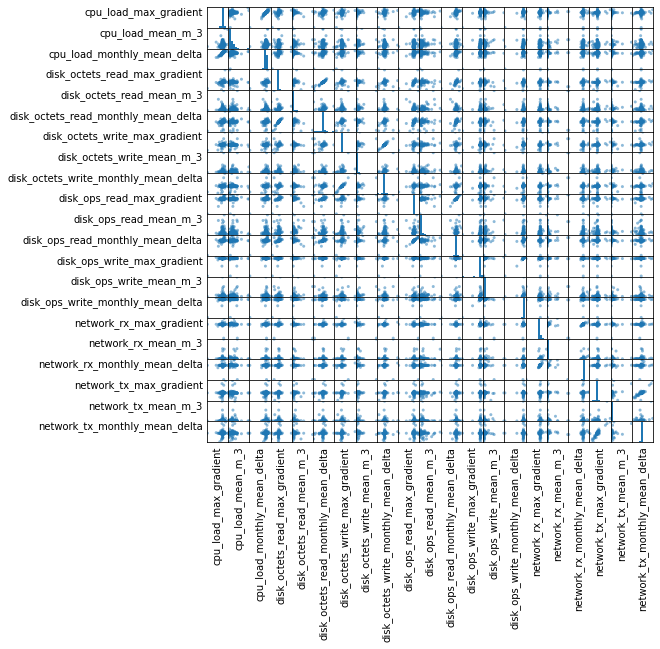

In [ ]:
# Correlations between independent variables.
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
# find correlated features
correlated_features = []#set()
correlation_matrix = numeric_data.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)
print(len(correlated_features))
print(correlated_features)

7
['cpu_load_monthly_mean_delta', 'disk_octets_read_monthly_mean_delta', 'disk_octets_write_monthly_mean_delta', 'disk_ops_read_monthly_mean_delta', 'disk_ops_write_monthly_mean_delta', 'network_rx_monthly_mean_delta', 'network_tx_monthly_mean_delta']


In [ ]:
# remove correlated features
df = df.select(list(set(set(df.columns) - set(correlated_features))  - set(['id'])))
#cols = df.columns
df.printSchema()

root
 |-- network_tx_mean_m_3: double (nullable = true)
 |-- network_rx_mean_m_3: double (nullable = true)
 |-- disk_ops_write_mean_m_3: double (nullable = true)
 |-- cpu_load_mean_m_3: double (nullable = true)
 |-- disk_ops_write_max_gradient: double (nullable = true)
 |-- disk_octets_write_mean_m_3: double (nullable = true)
 |-- is_churn: long (nullable = true)
 |-- cpu_load_max_gradient: double (nullable = true)
 |-- disk_ops_read_mean_m_3: double (nullable = true)
 |-- disk_ops_read_max_gradient: double (nullable = true)
 |-- disk_octets_write_max_gradient: double (nullable = true)
 |-- network_tx_max_gradient: double (nullable = true)
 |-- disk_octets_read_max_gradient: double (nullable = true)
 |-- network_rx_max_gradient: double (nullable = true)
 |-- disk_octets_read_mean_m_3: double (nullable = true)



In [ ]:
# check missing values
df.agg(*[F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()


+-------------------+-------------------+-----------------------+-----------------+---------------------------+--------------------------+--------+---------------------+----------------------+--------------------------+------------------------------+-----------------------+-----------------------------+-----------------------+-------------------------+
|network_tx_mean_m_3|network_rx_mean_m_3|disk_ops_write_mean_m_3|cpu_load_mean_m_3|disk_ops_write_max_gradient|disk_octets_write_mean_m_3|is_churn|cpu_load_max_gradient|disk_ops_read_mean_m_3|disk_ops_read_max_gradient|disk_octets_write_max_gradient|network_tx_max_gradient|disk_octets_read_max_gradient|network_rx_max_gradient|disk_octets_read_mean_m_3|
+-------------------+-------------------+-----------------------+-----------------+---------------------------+--------------------------+--------+---------------------+----------------------+--------------------------+------------------------------+-----------------------+----------------

Train models

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString, StringIndexer, VectorAssembler #VectorIndex
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Select independent variables
numeric_features = [t[0] for t in df.dtypes if t[1] == 'double']

# Define tranformating stages
labelIndexer = StringIndexer(inputCol="is_churn", outputCol="indexedLabel").fit(df)
featureIndexer = VectorAssembler(inputCols=numeric_features, outputCol="indexedFeatures")
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = df.randomSplit([0.7, 0.3])

# Define models with different algorithms.
lr = LogisticRegression(labelCol="indexedLabel", featuresCol="indexedFeatures", maxIter=10)
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxDepth = 3)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=100)
gbt = GBTClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxIter=10)

# Chain stages in a Pipeline
pipeline_lr = Pipeline(stages=[labelIndexer, featureIndexer, lr, labelConverter])
pipeline_dt = Pipeline(stages=[labelIndexer, featureIndexer, dt, labelConverter])
pipeline_rf = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])
pipeline_gbt = Pipeline(stages=[labelIndexer, featureIndexer, gbt, labelConverter])

# Fit model
model_lr = pipeline_lr.fit(trainingData)
model_dt = pipeline_dt.fit(trainingData)
model_rf = pipeline_rf.fit(trainingData)
model_gbt = pipeline_gbt.fit(trainingData)


Evaluate models

In [ ]:
# Evaluate models with Accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions_lr = model_lr.transform(testData)
predictions_dt = model_dt.transform(testData)
predictions_rf = model_rf.transform(testData)
predictions_gbt = model_gbt.transform(testData)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

print("Accuracy LR", evaluator.evaluate(predictions_lr))
print("Accuracy DT", evaluator.evaluate(predictions_dt))
print("Accuracy RF", evaluator.evaluate(predictions_rf))
print("Accuracy GBT", evaluator.evaluate(predictions_gbt))

Accuracy LR 0.6022727272727273
Accuracy DT 0.5681818181818182
Accuracy RF 0.5568181818181818
Accuracy GBT 0.625


In [ ]:
# Evaluate models with AUC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel")

print('AUC LR', evaluator.evaluate(predictions_lr))
print('AUC DT', evaluator.evaluate(predictions_dt))
print('AUC RF', evaluator.evaluate(predictions_rf))
print('AUC GBT', evaluator.evaluate(predictions_gbt))

AUC LR 0.6005263157894735
AUC DT 0.5455263157894737
AUC RF 0.6294736842105261
AUC GBT 0.6373684210526315


In [ ]:
# details of the model
rfModel = model_rf.stages[2]
print(rfModel)  # summary only

RandomForestClassificationModel: uid=RandomForestClassifier_f704f6084d04, numTrees=100, numClasses=2, numFeatures=14


In [ ]:
# Confusion matrix
from pyspark.sql.types import FloatType

from pyspark.mllib.evaluation import MulticlassMetrics

preds_and_labels = predictions_rf.select(['prediction','indexedLabel']).withColumn('labelIndex', F.col('indexedLabel').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','indexedLabel'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

[[27. 23.]
 [16. 22.]]


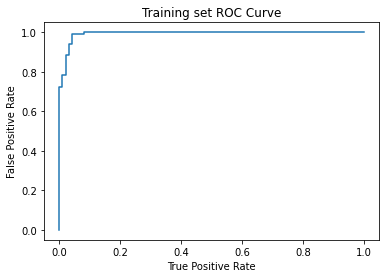

Training set areaUnderROC: 0.9927414264674942


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ROC Curve on training data
trainingSummary = model_rf.stages[2].summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Training set ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

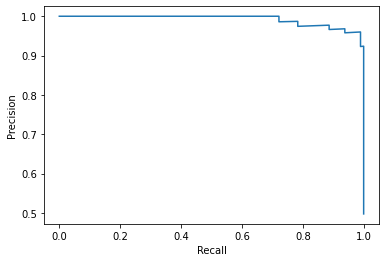

In [ ]:
# Precision and recall.
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Scala version implements .roc() and .pr()
# Python: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html
# Scala: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

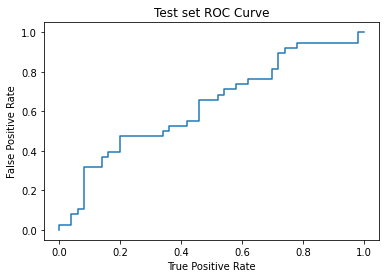

Test set areaUnderROC: 0.6294736842105261


In [ ]:
# ROC Curve on training data
probs_and_labels  = predictions_rf.select('indexedLabel','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['indexedLabel'])))
points = CurveMetrics(probs_and_labels).get_curve('roc')

x_val = [x[0] for x in points]
y_val = [x[1] for x in points]

plt.plot(x_val, y_val)
plt.title('Test set ROC Curve')
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()
print('Test set areaUnderROC: ' + str(evaluator.evaluate(predictions_rf)))

In [ ]:
predictions_rf.select('is_churn', 'rawPrediction', 'prediction', 'probability').show(10)

+--------+--------------------+----------+--------------------+
|is_churn|       rawPrediction|prediction|         probability|
+--------+--------------------+----------+--------------------+
|       1|[51.8235255029113...|       0.0|[0.51823525502911...|
|       1|[51.5004922239814...|       0.0|[0.51500492223981...|
|       1|[32.1258667300574...|       1.0|[0.32125866730057...|
|       0|[27.7403861127824...|       1.0|[0.27740386112782...|
|       0|[16.7300799154582...|       1.0|[0.16730079915458...|
|       1|[51.4747973727138...|       0.0|[0.51474797372713...|
|       1|[47.9889360574097...|       1.0|[0.47988936057409...|
|       1|[11.4278251160089...|       1.0|[0.11427825116008...|
|       1|[43.0751741477207...|       1.0|[0.43075174147720...|
|       0|[56.1794274653424...|       0.0|[0.56179427465342...|
+--------+--------------------+----------+--------------------+
only showing top 10 rows



Random Forest overfits , to high AUC on training compared to test. We try tuning GBT (Gradient-boosted tree) model

In [ ]:
print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [ ]:
# tuning parameters
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())

pipeline = Pipeline(stages=[labelIndexer, featureIndexer, gbt, labelConverter])

# Fit cross validated model
cv = CrossValidator(estimator = pipeline, estimatorParamMaps = paramGrid, evaluator = evaluator, numFolds = 5)
model_cv = cv.fit(trainingData)

# Evaluate model 
predictions_cv_training = model_cv.transform(trainingData)
predictions_cv_test = model_cv.transform(testData)

evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel")

# Print output
print('Training set areaUnderROC: ', evaluator.evaluate(predictions_cv_training))
print('Test set areaUnderROC: ', evaluator.evaluate(predictions_cv_test))


Training set areaUnderROC:  0.98511466442247
Test set areaUnderROC:  0.601842105263158


Use model to make predictions on the production data

In [ ]:
pr.printSchema()

root
 |-- cpu_load_max_gradient: double (nullable = true)
 |-- cpu_load_mean_m_3: double (nullable = true)
 |-- cpu_load_monthly_mean_delta: double (nullable = true)
 |-- disk_octets_read_max_gradient: double (nullable = true)
 |-- disk_octets_read_mean_m_3: double (nullable = true)
 |-- disk_octets_read_monthly_mean_delta: double (nullable = true)
 |-- disk_octets_write_max_gradient: double (nullable = true)
 |-- disk_octets_write_mean_m_3: double (nullable = true)
 |-- disk_octets_write_monthly_mean_delta: double (nullable = true)
 |-- disk_ops_read_max_gradient: double (nullable = true)
 |-- disk_ops_read_mean_m_3: double (nullable = true)
 |-- disk_ops_read_monthly_mean_delta: double (nullable = true)
 |-- disk_ops_write_max_gradient: double (nullable = true)
 |-- disk_ops_write_mean_m_3: double (nullable = true)
 |-- disk_ops_write_monthly_mean_delta: double (nullable = true)
 |-- id: long (nullable = true)
 |-- is_churn: string (nullable = true)
 |-- network_rx_max_gradient: doub

In [ ]:
pr.describe().show()

+-------+---------------------+------------------+---------------------------+-----------------------------+-------------------------+-----------------------------------+------------------------------+--------------------------+------------------------------------+--------------------------+----------------------+--------------------------------+---------------------------+-----------------------+---------------------------------+------------------+--------+-----------------------+-------------------+-----------------------------+-----------------------+-------------------+-----------------------------+
|summary|cpu_load_max_gradient| cpu_load_mean_m_3|cpu_load_monthly_mean_delta|disk_octets_read_max_gradient|disk_octets_read_mean_m_3|disk_octets_read_monthly_mean_delta|disk_octets_write_max_gradient|disk_octets_write_mean_m_3|disk_octets_write_monthly_mean_delta|disk_ops_read_max_gradient|disk_ops_read_mean_m_3|disk_ops_read_monthly_mean_delta|disk_ops_write_max_gradient|disk_ops_writ

In [ ]:
# Make predictions on production data
predictions = model_cv.transform(pr)
predictions = predictions.select('id', 'is_churn', 'rawPrediction', 'prediction', 'probability')
predictions = predictions.withColumn("is_churn", F.when(predictions.prediction == 0,"0") \
                      .when(predictions.prediction == 1,"1")) 
predictions.show(10)

+---+--------+--------------------+----------+--------------------+
| id|is_churn|       rawPrediction|prediction|         probability|
+---+--------+--------------------+----------+--------------------+
|  0|       0|[0.77273892203416...|       0.0|[0.82425963206921...|
|  1|       0|[0.21940425146059...|       0.0|[0.60797508425095...|
|  2|       0|[0.67966510446188...|       0.0|[0.79565081755189...|
|  3|       0|[0.21451777166994...|       0.0|[0.60564334158584...|
|  4|       0|[0.67251327101294...|       0.0|[0.79331533918922...|
|  5|       0|[0.53226252459133...|       0.0|[0.74355433800099...|
|  6|       0|[0.14221238481208...|       0.0|[0.57063067967804...|
|  7|       1|[-0.7504913350946...|       1.0|[0.18227900776927...|
|  8|       0|[0.23331898981441...|       0.0|[0.61458770320103...|
|  9|       1|[-0.8023214795185...|       1.0|[0.16733369726510...|
+---+--------+--------------------+----------+--------------------+
only showing top 10 rows



In [ ]:
predictions.write.json('/tmp/vps_predict_data_py.json')
